In [0]:
from __future__ import print_function

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

tf.enable_eager_execution()

### Prepare dataset

In [0]:
encoding = {
'a': np.array([1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]),
'b': np.array([1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]),
'c': np.array([1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]),
'd': np.array([1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]),
'e': np.array([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0]),
'f': np.array([0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]),
'g': np.array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]),
'h': np.array([0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]),
'i': np.array([1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]),
'j': np.array([1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]),
'k': np.array([1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]),
'l': np.array([1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]),
'm': np.array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]),
'n': np.array([0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]),
'o': np.array([0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]),
'p': np.array([0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]),
'q': np.array([0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]),
'r': np.array([0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]),
's': np.array([0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]),
't': np.array([0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]),
'u': np.array([1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]),
'v': np.array([1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]),
'w': np.array([1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0]),
'x': np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]),
'y': np.array([0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]),
'z': np.array([0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]),
'1': np.array([0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]),
'2': np.array([0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]),
'3': np.array([1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]),
'4': np.array([1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]),
'5': np.array([1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]),
'6': np.array([1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]),
'7': np.array([0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]),
'8': np.array([0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]),
'0': np.array([0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]),
'=>': np.array([0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]),
}


In [0]:
input_string = ['=>','t','y','s','o','n','t','h','o','m','a','s']

In [0]:
output_pred = np.array([
    [0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0],
])

In [35]:
output_pred.shape

(12, 12)

In [0]:
num_samples = 6 * 100

In [0]:
encoder_input_data = np.zeros(
    (num_samples, len(input_string),len(encoding['=>'])),
    dtype='float32')
target_data = np.zeros(
    (num_samples, len(input_string),len(input_string)),
    dtype='float32')

input_encoder = np.zeros((len(input_string),len(encoding['=>'])), dtype='float32')

for i in range(len(input_string)):
  input_encoder[i] = encoding[input_string[i]]

for i in range(num_samples):
    encoder_input_data[i] = input_encoder
    target_data[i] = output_pred

In [38]:
input_encoder.shape

(12, 64)

In [39]:
encoder_input_data.shape

(600, 12, 64)

In [40]:
target_data.shape

(600, 12, 12)

#### Example input -> output sequence

`['=>','t','t','h','o', 'm', 'a', '1', '7'] ->  ['t','h','o', 'm', 'a', '1', '7','=>']`

## Encoder & Decoder Network

In [0]:
class Encoder(tf.keras.Model):
    def __init__(self, hidden_dimensions):
        super(Encoder, self).__init__()
        self.lstm = layers.LSTM(hidden_dimensions, return_sequences=True, return_state=True)
        
    def call(self, x):
        output, state_h, state_c  = self.lstm(x)        
        return output, [state_h, state_c]

In [0]:
class Decoder(tf.keras.Model):
     def __init__(self, hidden_dimensions):
        super(Decoder, self).__init__()
        self.lstm = layers.LSTM(hidden_dimensions, return_sequences=True, return_state=True)
     
     def call(self, x, hidden_states):
        dec_output, state_h, state_c  = self.lstm(x, initial_state=hidden_states)
        # dec_output shape -> (batch_size, 1, hidden_dimension) -> (32, 1, 256)

        return dec_output, [state_h, state_c]

In [0]:
class Attention(tf.keras.Model):
     def __init__(self, hidden_dimensions):
        super(Attention, self).__init__()
        # Note: Dense layer -> dot(input, kernel) -> so now Ui = vT . tanh(W1 . e + W2 . di)  becomes Ui = tanh(e . W1 + di . W2) . v
        self.W1 = tf.keras.layers.Dense(hidden_dimensions, use_bias=False) # weights -> (256, 256)
        self.W2 = tf.keras.layers.Dense(hidden_dimensions, use_bias=False) # weights -> (256, 256)
        self.V = tf.keras.layers.Dense(1, use_bias=False) # weights -> (256, 1)
        
     
     def call(self, encoder_outputs, dec_output):
        # encoder_outputs shape -> (batch_size, input_sequence_length, hidden_dimension) -> (32, 9, 256)
        # dec_output shape -> (batch_size, 1, hidden_dimension) -> (32, 1, 256)

        # w1_e -> (*, 9, 256) * (*, 256, 256) -> (*, 9, 256)
        w1_e = self.W1(encoder_outputs)
        
        # w2_e -> (*, 1, 256) * (*, 256, 256) -> (*, 1, 256)
        w2_d = self.W2(dec_output)
        
        # tanh_output -> (*, 9, 256) + (*, 1, 256) -> (*, 9, 256)
        tanh_output = tf.nn.tanh(w1_e + w2_d)
        
        # tanh_output -> (*, 9, 256) + (*, 256, 1) -> (*, 9, 1)
        v_dot_tanh = self.V(tanh_output)
        
        # attention_weights -> (batch_size, input_sequence_length, 1) -> (32, 9, 1)
        attention_weights = tf.nn.softmax(v_dot_tanh, axis=1)
        
        return tf.reshape(attention_weights, (attention_weights.shape[0], attention_weights.shape[1])) # (batch_size, input_sequence_length) -> (32, 9)

In [0]:
num_encoder_tokens = len(encoding['=>'])
encoder_seq_length = len(input_string)
hidden_dimensions = 256

In [45]:
print("Input dimension: ", num_encoder_tokens)

Input dimension:  64


In [46]:
print("Input sequence length: ", encoder_seq_length)

Input sequence length:  12


In [47]:
print("RNN Network hiddent dimension: ", hidden_dimensions)

RNN Network hiddent dimension:  256


### Initialize encoder and decoder network

In [0]:
encoder = Encoder(hidden_dimensions)
decoder = Decoder(hidden_dimensions)
attention = Attention(hidden_dimensions)

### Setup tensorflow dataset for traning 

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((
   encoder_input_data,
   target_data
))

# Divide to 32 batches
batches = 32
dataset = dataset.shuffle(100).batch(32)

In [50]:
dataset

<DatasetV1Adapter shapes: ((?, 12, 64), (?, 12, 12)), types: (tf.float32, tf.float32)>

#### Output of network before training

In [51]:
# Input sequence
print("Input sequence: %s"% input_string)

#Initialize values
attention_vector_array = []
final_output_sequence = []

# expand the sequences to be batch size of 1 to be fed as input
encoder_input = tf.expand_dims(input_encoder, 0)
target_data = tf.expand_dims(output_pred, 0)

# encoder_input shapes -> (batch_size, input_sequence_length, input_dimension)
# encoder_outputs shape -> (batch_size, input_sequence_length, hidden_dimension)
encoder_outputs, encoder_states = encoder(encoder_input)

# first decoder input '=>'
dec_input = tf.expand_dims(encoder_input[:, 0], 1)

# loading the final encoder states to decoder network as initial hidden states
decoder_states = encoder_states

print("\nPrediction for ")
for i in range(0, encoder_input.shape[1]):
    decoder_output, decoder_states = decoder(dec_input, decoder_states)
    target_prediction = attention(encoder_outputs, decoder_output)
    
    # Save the attention vector
    attention_vector_array.append(target_prediction.numpy()[0])
    final_output_sequence.append(np.round(target_prediction.numpy()[0]))
    print("%dth position -> %d -> %s"%(i, np.argmax(target_prediction), input_string[np.argmax(target_prediction)]))

    # pass the predicted value as next input state to decoder network
    dec_input = tf.expand_dims(encoder_input[:, np.argmax(target_prediction)], 1) # works only for one input combination

print("\nTarget output values (softmax values over the input sequence size)")
print(target_data.numpy()[0])
print("\nPredicted output values")
print(np.array(final_output_sequence))

Input sequence: ['=>', 't', 'y', 's', 'o', 'n', 't', 'h', 'o', 'm', 'a', 's']

Prediction for 
0th position -> 10 -> a
1th position -> 9 -> m
2th position -> 9 -> m
3th position -> 9 -> m
4th position -> 9 -> m
5th position -> 9 -> m
6th position -> 9 -> m
7th position -> 9 -> m
8th position -> 9 -> m
9th position -> 9 -> m
10th position -> 9 -> m
11th position -> 9 -> m

Target output values (softmax values over the input sequence size)
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]]

Predicted output values
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0.

### Train Model

In [0]:
optimizer = tf.train.AdamOptimizer()

In [53]:
epochs = 10
loss_history = []
total_attention = []
for epoch in range(epochs):
    # encoder_input shapes -> (batch_size, input_sequence_length, input_dimension)
    for (batch, (encoder_input, target_data)) in enumerate(dataset):
        loss = 0

        with tf.GradientTape() as tape:
            encoder_outputs, encoder_states = encoder(encoder_input)
            # encoder_outputs shape -> (batch_size, input_sequence_length, hidden_state_dimension) -> (32, 9, 256)
            # encoder states shape -> (batch_size, hidden_state_dimension) -> (32, 256)
    
            # first decoder input '=>'
            # dec_input shape -> (batch_size, input_lenght=1, input_dimension) -> (32, 1, 64)
            dec_input = tf.expand_dims(encoder_input[:, 0], 1) # The '=>' symbol loaded as input
            
            # loading the final encoder states to decoder network as initial hidden states
            # decoder states shape -> (batch_size, hidden_state_dimension) -> (32, 256)
            decoder_states = encoder_states

            # track attention over each output sequence
            attention_vector_array = []
            
            # iterrate over the times of input sequence size or till the output points to '=>' symbol
            for i in range(0, encoder_input.shape[1]):
              # decoder outputs shape -> (batch_size, input_lenght=1, hidden_state_dimension) -> (32, 1, 256)
              # decoder states shape -> (batch_size, hidden_state_dimension) -> (32, 256)
              decoder_output, decoder_states = decoder(dec_input, decoder_states)
              
              # target prediction -> (batch_size, input_sequence_length) -> (32, 9)
              # target prediction points to one of the input sequence element -> element with highest value
              target_prediction = attention(encoder_outputs, decoder_output)
              
              if batch % 10 == 0:
                attention_vector_array.append(target_prediction.numpy()[0])

              # used for training the network by using the target data
              tar_data = target_data[:, i]
              # load the input state to decoder network for next prediction
              dec_input = tf.expand_dims(encoder_input[:, np.argmax(tar_data)], 1) # Works only for one input combination

              # loss value calculated as categorical crossentropy
              loss += tf.reduce_mean(tf.keras.backend.categorical_crossentropy(tar_data, target_prediction))

        batch_loss = (loss / batches)
        if batch % 10 == 0:
            total_attention.append(attention_vector_array)
            print("\tEpoch {:03d}/{:03d}: Loss at step {:02d}: {:.9f}".format((epoch+1), epochs, batch, tf.reduce_mean(tf.keras.backend.categorical_crossentropy(tar_data, target_prediction))))
        # store the loss history 
        loss_history.append(batch_loss.numpy())
        # fetch the trainable variables
        variables = encoder.variables + decoder.variables
        # calculate the gradient
        grads = tape.gradient(loss, variables)
        # update the weights of the network
        optimizer.apply_gradients(zip(grads, variables), global_step=tf.train.get_or_create_global_step())
    print("Epoch {:03d}/{:03d} completed \t - \tBatch loss: {:.9f}".format((epoch+1), epochs, tf.reduce_mean(tf.keras.backend.categorical_crossentropy(tar_data, target_prediction))))
print("Final loss: {:.9f}".format(tf.reduce_mean(tf.keras.backend.categorical_crossentropy(tar_data, target_prediction))))

	Epoch 001/010: Loss at step 00: 2.586486340
	Epoch 001/010: Loss at step 10: 1.652926207
Epoch 001/010 completed 	 - 	Batch loss: 0.737634003
	Epoch 002/010: Loss at step 00: 0.594395161
	Epoch 002/010: Loss at step 10: 0.283425897
Epoch 002/010 completed 	 - 	Batch loss: 0.221804753
	Epoch 003/010: Loss at step 00: 0.212876111
	Epoch 003/010: Loss at step 10: 0.166659266
Epoch 003/010 completed 	 - 	Batch loss: 0.142695352
	Epoch 004/010: Loss at step 00: 0.140396357
	Epoch 004/010: Loss at step 10: 0.127221733
Epoch 004/010 completed 	 - 	Batch loss: 0.124605991
	Epoch 005/010: Loss at step 00: 0.124018788
	Epoch 005/010: Loss at step 10: 0.119092867
Epoch 005/010 completed 	 - 	Batch loss: 0.113801777
	Epoch 006/010: Loss at step 00: 0.113012649
	Epoch 006/010: Loss at step 10: 0.105430283
Epoch 006/010 completed 	 - 	Batch loss: 0.100743979
	Epoch 007/010: Loss at step 00: 0.100178391
	Epoch 007/010: Loss at step 10: 0.096093237
Epoch 007/010 completed 	 - 	Batch loss: 0.091945909

#### Attention plot over the input sequence

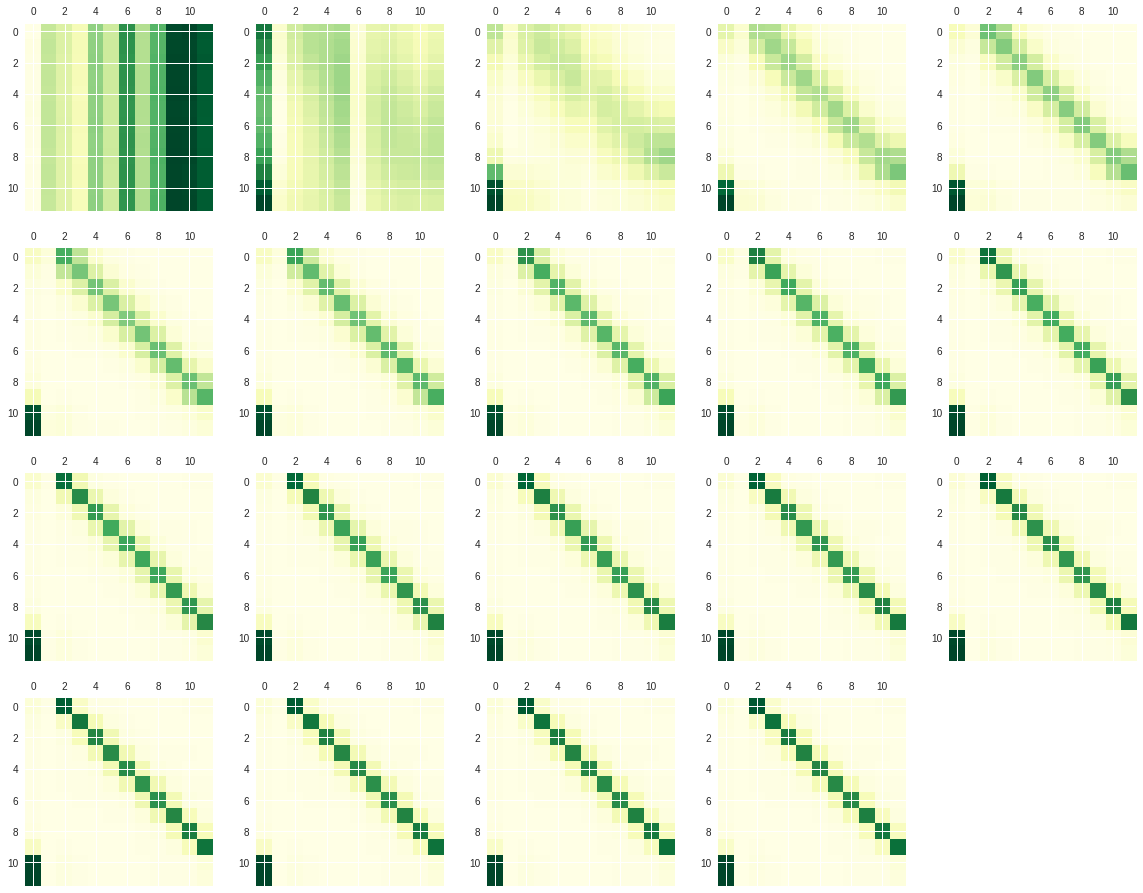

In [54]:
fig = plt.figure(figsize=(20,20))
for i in range(1, len(total_attention)):
  fig.add_subplot(len(total_attention)/4, len(total_attention)/4, i).matshow(np.array(total_attention[i-1]), cmap='YlGn')
plt.show()

### Loss plot over the entire training sequence

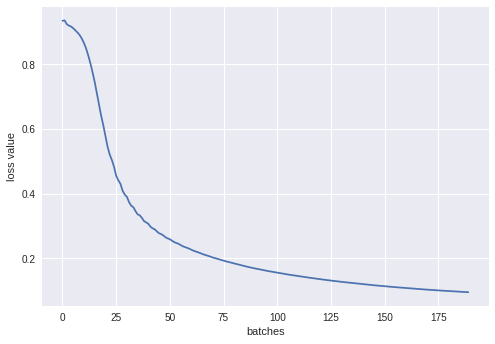

In [55]:
plt.plot(loss_history)

plt.ylabel('loss value')
plt.xlabel('batches')

plt.show()

### Inference Model

#### Output of network after training

In [56]:
# Input sequence
print("Input sequence: %s"% input_string)

#Initialize values
attention_vector_array = []
final_output_sequence = []

# expand the sequences to be batch size of 1 to be fed as input
encoder_input = tf.expand_dims(input_encoder, 0)
target_data = tf.expand_dims(output_pred, 0)

# encoder_input shapes -> (number_of_inputs, input_sequence_length, input_dimension)
# encoder_outputs shape -> (number_of_inputs, input_sequence_length, hidden_dimension)
encoder_outputs, encoder_states = encoder(encoder_input)

# first decoder input '=>'
dec_input = tf.expand_dims(encoder_input[:, 0], 1)

# loading the final encoder states to decoder network as initial hidden states
decoder_states = encoder_states

print("\nPrediction for ")
for i in range(0, encoder_input.shape[1]):
    decoder_output, decoder_states = decoder(dec_input, decoder_states)
    target_prediction = attention(encoder_outputs, decoder_output)
    
    # Save the attention vector
    attention_vector_array.append(target_prediction.numpy()[0])
    final_output_sequence.append(np.round(target_prediction.numpy()[0]))
    print("%dth position -> %d -> %s"%(i, np.argmax(target_prediction), input_string[np.argmax(target_prediction)]))

    # pass the predicted value as next input state to decoder network
    dec_input = tf.expand_dims(encoder_input[:, np.argmax(target_prediction)], 1) # works only for one input combination

print("\nTarget output values (softmax values over the input sequence size)")
print(target_data.numpy()[0])
print("\nPredicted output values")
print(np.array(final_output_sequence))

Input sequence: ['=>', 't', 'y', 's', 'o', 'n', 't', 'h', 'o', 'm', 'a', 's']

Prediction for 
0th position -> 2 -> y
1th position -> 3 -> s
2th position -> 4 -> o
3th position -> 5 -> n
4th position -> 6 -> t
5th position -> 7 -> h
6th position -> 8 -> o
7th position -> 9 -> m
8th position -> 10 -> a
9th position -> 11 -> s
10th position -> 0 -> =>
11th position -> 0 -> =>

Target output values (softmax values over the input sequence size)
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]]

Predicted output values
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [58]:
np.array(attention_vector_array)

array([[2.66826153e-02, 2.57624849e-03, 8.70207310e-01, 6.21546544e-02,
        9.87752061e-03, 3.84392566e-03, 2.59830710e-03, 2.23554019e-03,
        2.13384489e-03, 3.21914838e-03, 5.58472378e-03, 8.88618361e-03],
       [1.29067870e-02, 1.08288496e-03, 6.49634674e-02, 7.84978509e-01,
        1.01402938e-01, 1.45443371e-02, 5.11186523e-03, 2.57323543e-03,
        2.32252060e-03, 3.17899161e-03, 2.98776780e-03, 3.94662656e-03],
       [8.00716691e-03, 6.36503624e-04, 1.28889289e-02, 8.96886736e-02,
        7.57103384e-01, 1.05739295e-01, 1.30596031e-02, 3.13395029e-03,
        2.00622156e-03, 2.37094425e-03, 2.40361993e-03, 2.96171266e-03],
       [6.98580220e-03, 4.89634345e-04, 6.89912913e-03, 1.09430403e-02,
        1.01995878e-01, 7.24566698e-01, 1.16448209e-01, 1.35685951e-02,
        5.72271645e-03, 5.73500898e-03, 4.21509333e-03, 2.43018102e-03],
       [5.42958081e-03, 3.64749460e-04, 4.50197607e-03, 3.71039007e-03,
        1.48414476e-02, 1.11184634e-01, 7.11639822e-01, 1.19

References:

* https://arxiv.org/pdf/1506.03134.pdf
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense